In [91]:
# Gerekli kitaplıkları içe aktarın.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets


from warnings import filterwarnings
filterwarnings('ignore')

In [92]:
# Sklearn'de make_classification fonksiyonunu kullanarak veri kümesi oluşturun.
# Pandas veri çerçevesine dönüştürün.

X, y = datasets.make_classification(n_samples = 10000, n_features = 9, n_informative = 4, class_sep = 2, random_state = 18)

In [93]:
df = pd.DataFrame(X, columns = ["f1","f2","f3","f4","f5","f6","f7","f8","f9"])
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,3.290489,-0.411827,-0.600695,-4.250619,-0.209376,1.019036,-5.717909,-0.179226,-0.914161
1,-0.543413,-3.782512,0.390637,0.023942,2.010453,1.185315,1.218147,0.007708,-0.957374
2,-2.697898,-3.862467,-0.407272,-0.704430,2.803621,2.080082,1.416647,0.583622,1.332092
3,1.051777,-3.129374,-0.499094,0.575599,-0.894801,1.997441,1.938695,-0.113648,0.882476
4,2.913780,2.582148,-1.755320,-2.224739,-5.067421,2.062468,-2.614919,-1.154300,0.303457


In [94]:
df["target"] = y

In [95]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,target
0,3.290489,-0.411827,-0.600695,-4.250619,-0.209376,1.019036,-5.717909,-0.179226,-0.914161,0
1,-0.543413,-3.782512,0.390637,0.023942,2.010453,1.185315,1.218147,0.007708,-0.957374,0
2,-2.697898,-3.862467,-0.407272,-0.704430,2.803621,2.080082,1.416647,0.583622,1.332092,1
3,1.051777,-3.129374,-0.499094,0.575599,-0.894801,1.997441,1.938695,-0.113648,0.882476,0
4,2.913780,2.582148,-1.755320,-2.224739,-5.067421,2.062468,-2.614919,-1.154300,0.303457,0


In [96]:
df.shape

(10000, 10)

In [97]:
df["target"].value_counts()

1    5004
0    4996
Name: target, dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      10000 non-null  float64
 1   f2      10000 non-null  float64
 2   f3      10000 non-null  float64
 3   f4      10000 non-null  float64
 4   f5      10000 non-null  float64
 5   f6      10000 non-null  float64
 6   f7      10000 non-null  float64
 7   f8      10000 non-null  float64
 8   f9      10000 non-null  float64
 9   target  10000 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 742.3 KB


In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
f1,10000.0,0.000742,2.393360,-6.710074,-1.981640,-0.078133,1.994817,8.235676
f2,10000.0,-1.002711,2.156767,-6.880651,-2.491544,-1.520075,0.144942,7.081111
f3,10000.0,0.001397,1.007745,-3.548938,-0.688496,-0.010870,0.692158,3.738392
f4,10000.0,-1.018837,1.785009,-6.317542,-2.381084,-1.197160,0.665134,3.778696
f5,10000.0,-0.984852,3.711534,-16.711622,-3.393934,-0.401644,1.467977,11.731977
f6,10000.0,2.015345,1.316801,-2.791869,1.151817,2.005485,2.886579,6.911073
f7,10000.0,0.000921,2.213916,-6.808080,-1.991508,0.206321,1.999211,4.997483
f8,10000.0,0.008026,0.999628,-3.714038,-0.664733,-0.002433,0.675401,3.995229
f9,10000.0,0.004308,0.994603,-3.633721,-0.670409,-0.004627,0.680110,3.845220
target,10000.0,0.500400,0.500025,0.000000,0.000000,1.000000,1.000000,1.000000


In [100]:
# Yinelenen satırları ve eksik verileri kontrol edin.

df.duplicated().sum()

0

In [101]:
df.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
target    0
dtype: int64

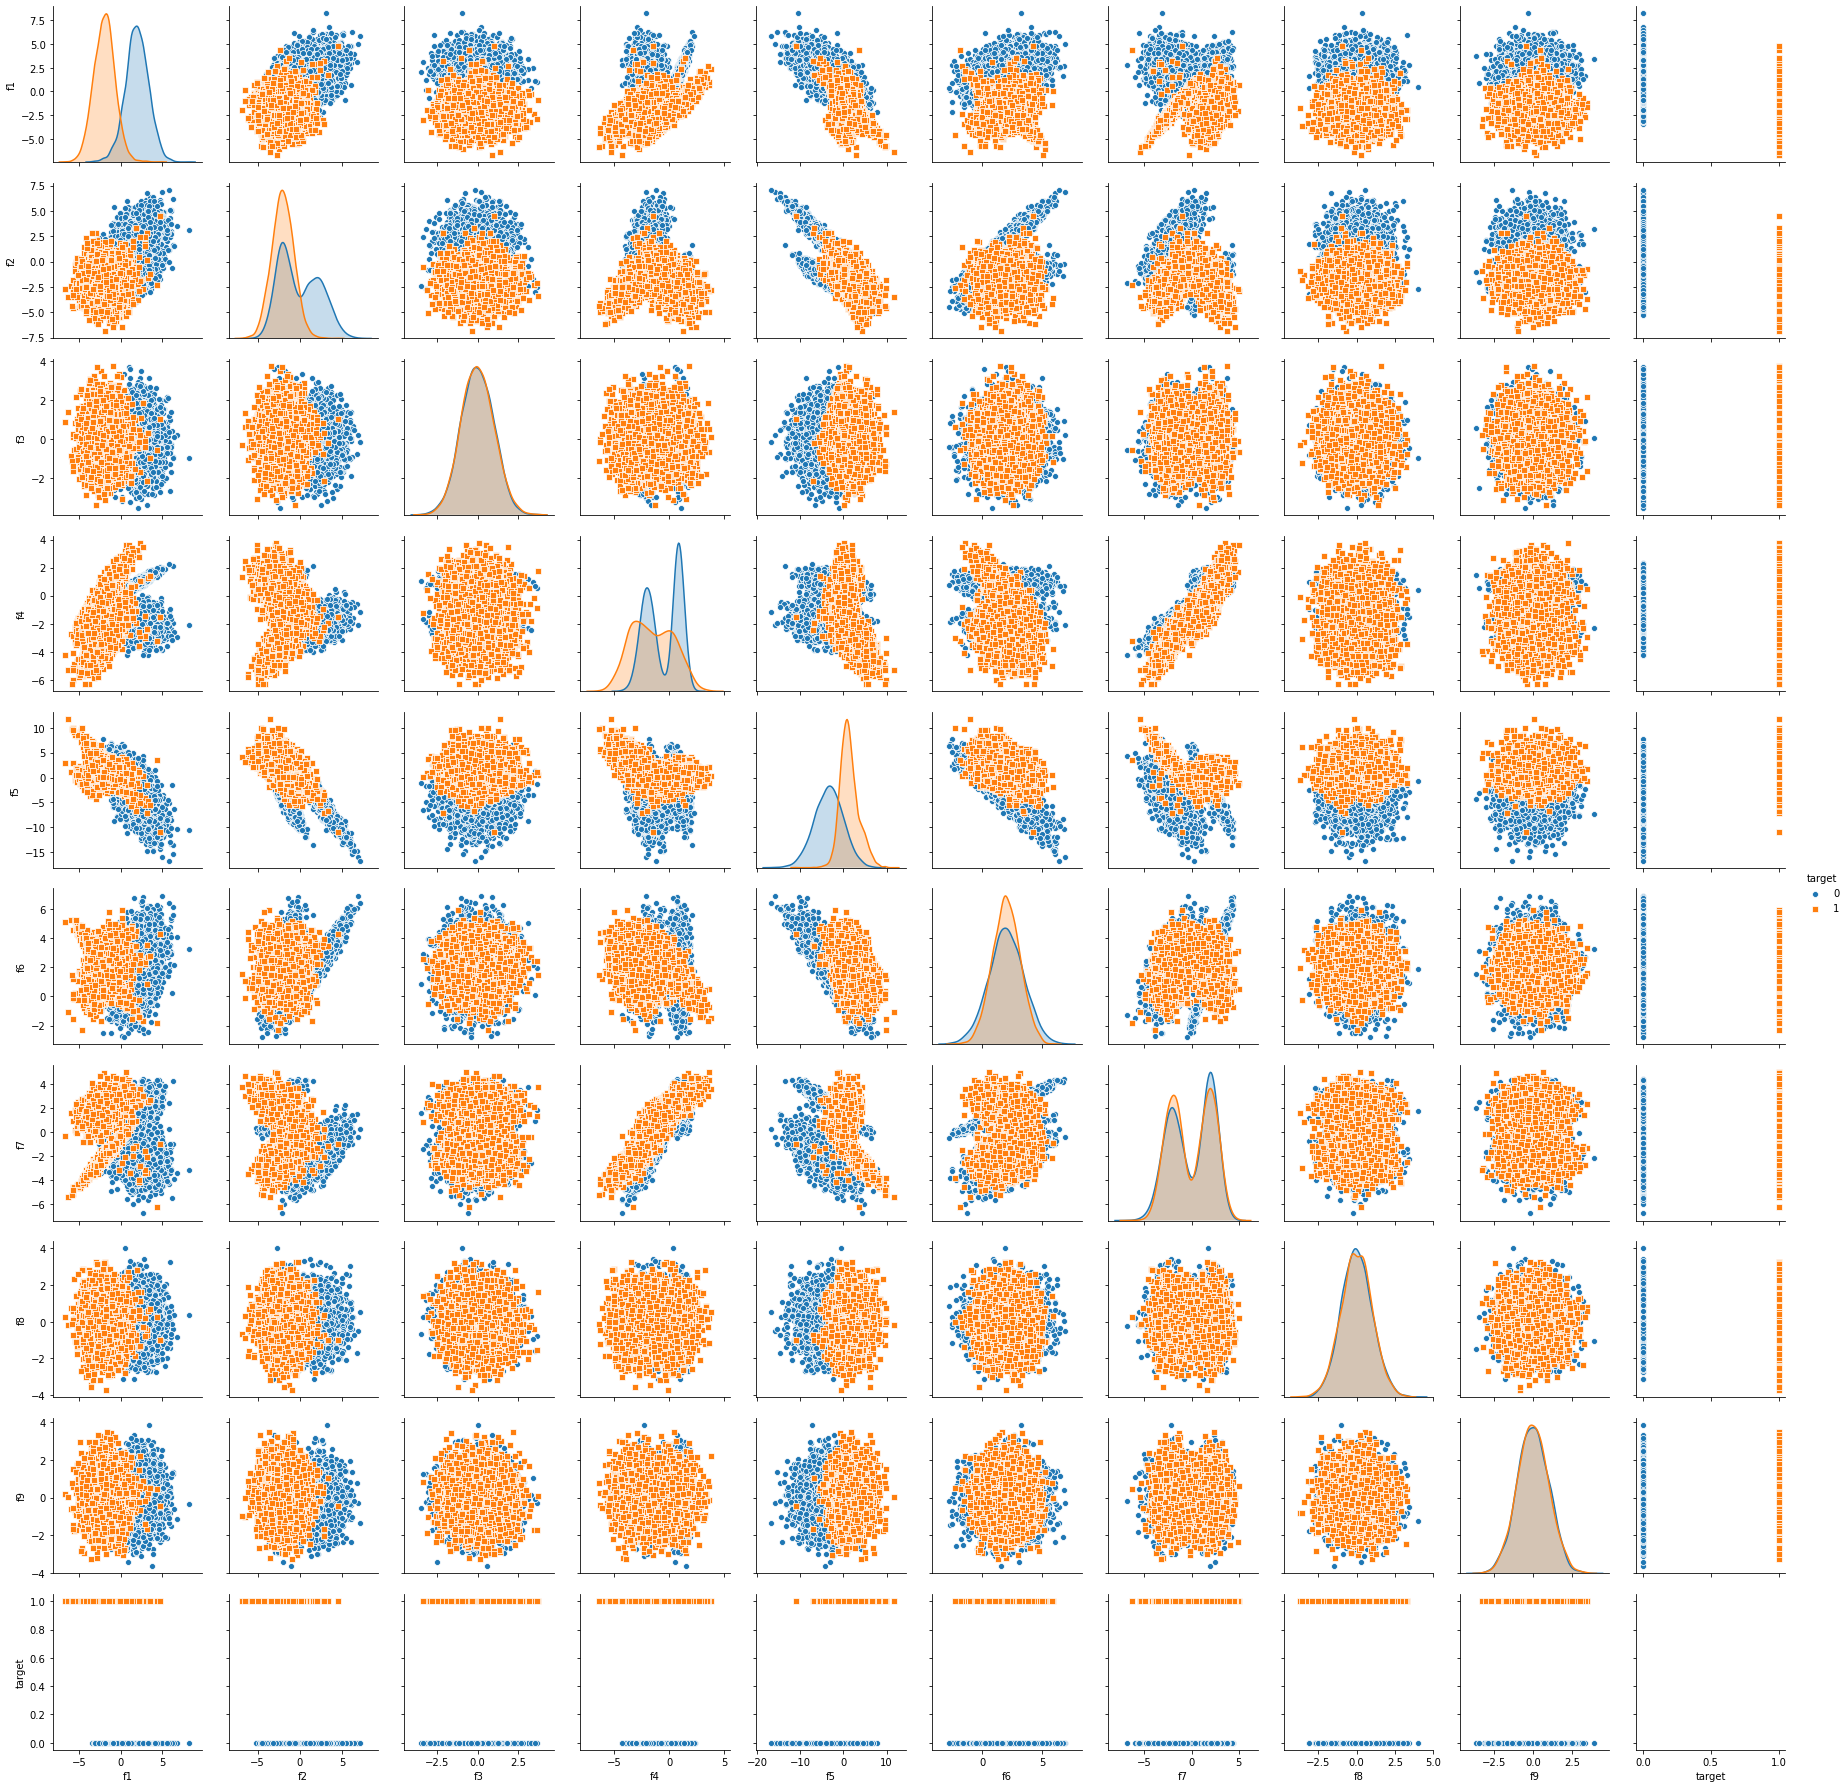

In [102]:
# Her özellik için verileri görselleştirin (pairplot, distplot etc.).
# Gordugumuz gibi hue = "target" ve marker = ['o', 's'] olarak belirledigimzde siniflari daha acik sekilde gozlemleyebiliriz
sns.pairplot(df, hue = 'target', markers = ['o', 's']);

In [103]:
# Korelasyon matrisi çizin.
df.corr()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,target
f1,1.000000,0.475540,-0.017420,0.369423,-0.779957,0.066801,0.076522,0.000242,-0.003851,-0.827383
f2,0.475540,1.000000,-0.009106,-0.198418,-0.725945,0.257191,-0.333581,0.002245,0.003442,-0.460591
f3,-0.017420,-0.009106,1.000000,-0.005140,0.004946,0.018591,0.007261,-0.002698,-0.000366,0.004585
f4,0.369423,-0.198418,-0.005140,1.000000,-0.305216,-0.142264,0.895971,-0.013030,-0.009711,-0.271423
f5,-0.779957,-0.725945,0.004946,-0.305216,1.000000,-0.543672,-0.227263,0.007940,0.007284,0.644730
f6,0.066801,0.257191,0.018591,-0.142264,-0.543672,1.000000,0.175031,-0.011528,-0.009937,-0.004253
f7,0.076522,-0.333581,0.007261,0.895971,-0.227263,0.175031,1.000000,-0.017993,-0.012860,-0.003718
f8,0.000242,0.002245,-0.002698,-0.013030,0.007940,-0.011528,-0.017993,1.000000,-0.011155,-0.003832
f9,-0.003851,0.003442,-0.000366,-0.009711,0.007284,-0.009937,-0.012860,-0.011155,1.000000,0.000261
target,-0.827383,-0.460591,0.004585,-0.271423,0.644730,-0.004253,-0.003718,-0.003832,0.000261,1.000000


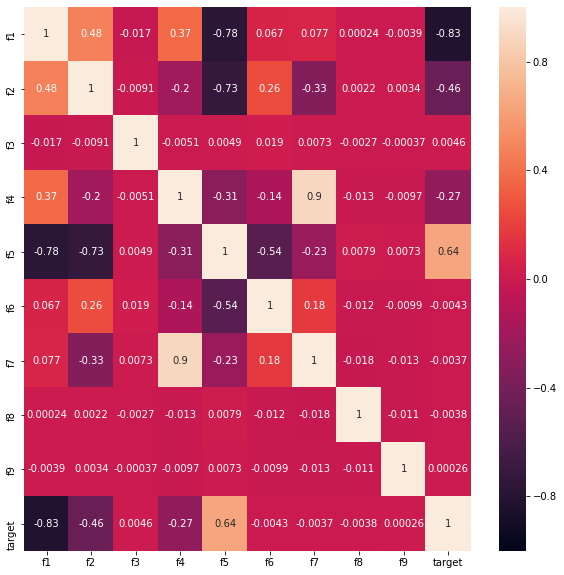

In [104]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),vmin = -1, vmax = 1, annot = True);

In [105]:
# Aykırı değerleri işleyin (IsolationForest, Z-score, IQR kullanabilirsiniz)


In [106]:
X = df.drop("target", axis = 1)
y = df[["target"]]

In [107]:
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,3.290489,-0.411827,-0.600695,-4.250619,-0.209376,1.019036,-5.717909,-0.179226,-0.914161
1,-0.543413,-3.782512,0.390637,0.023942,2.010453,1.185315,1.218147,0.007708,-0.957374
2,-2.697898,-3.862467,-0.407272,-0.704430,2.803621,2.080082,1.416647,0.583622,1.332092
3,1.051777,-3.129374,-0.499094,0.575599,-0.894801,1.997441,1.938695,-0.113648,0.882476
4,2.913780,2.582148,-1.755320,-2.224739,-5.067421,2.062468,-2.614919,-1.154300,0.303457


In [108]:
y.head()

,target
0,0
1,0
2,1
3,0
4,0


In [109]:
# Isolation Forest
from sklearn.ensemble import IsolationForest
iso_model = IsolationForest(contamination=0.1)
predicted_iso = iso_model.fit_predict(X)

In [110]:
predicted_iso

array([-1,  1,  1, ...,  1,  1,  1])

In [111]:
# outlier'leri temizleyelim
not_outlier = predicted_iso != -1
not_outlier[0:10]

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

In [112]:
new_X = X[not_outlier]
new_X.shape

(9000, 9)

In [113]:
list(new_X.index) == list(y.index)

False

In [114]:
new_y =  y.loc[list(new_X.index)]
new_y.shape

(9000, 1)

In [115]:
new_X.reset_index(inplace = True)

In [116]:
new_X.drop("index", axis = 1, inplace = True)

In [117]:
new_y.reset_index(inplace = True)

In [118]:
new_y.drop("index", axis = 1, inplace = True)

In [119]:
# Veri kümesini eğitim ve test verisetlerine ayırın.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size = 0.30, random_state = 42)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (6300, 9)
X_test Shape:  (2700, 9)
y_train Shape:  (6300, 1)
y_test Shape:  (2700, 1)


In [121]:
# Karar Ağacını içe aktarın, farklı hiperparametreleri deneyerek algoritmayı ayarlayın. (hyperpara)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier()
tree_params = {"max_depth": [2,3,4,5,10,20],
               "min_samples_split": [2,10,5,30,50,10],
               "criterion": ["gini", "entropy"],
               "max_features": ["auto", "sqrt", "log2"]}

tree_cv = GridSearchCV(tree_model, tree_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    6.4s finished


In [125]:
print("Optimum hyperparameter degerleri: ", "\n", tree_cv.best_params_)

Optimum hyperparameter degerleri:  
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5}


In [127]:
tuned_tree_model = DecisionTreeClassifier(criterion = "entropy",
                                          max_depth = 10,
                                          max_features = "log2",
                                          min_samples_split = 5).fit(X_train, y_train)

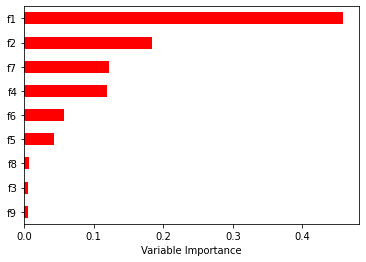

In [133]:
# Öznitelik önemlerini (feature importances) görselleştirin.
Importance = pd.DataFrame({"Importance": tuned_tree_model.feature_importances_},
                           index = X_train.columns)

Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                             color = 'red')

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

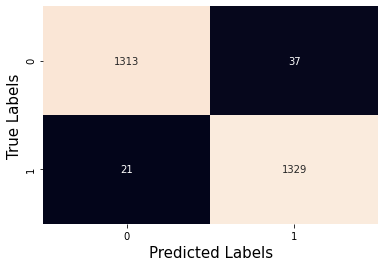

In [164]:
# Hata matrisini oluşturun ve accuracy, recall, precision ve f1-score değerlerini hesaplayın.
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

y_pred = tuned_tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True, cbar = False, fmt = "g");
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [165]:
# accuracy, recall, precision ve f1-score

print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
print("F1 Score = {}".format(f1_score(y_test, y_pred,average='macro')))

Accuracy = 0.9785185185185186
Recall = 0.9785185185185186
Precision = 0.9785857437313554
F1 Score = 0.9785177641354759


In [166]:
# XGBoostClassifier'ı içe aktarın, farklı hiperparametreleri deneyerek algoritmayı ayarlayın.

#!pip install xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_params = {"n_estimators": [100, 500, 1000, 2000],
              "subsample": [0.6, 0.8, 1],
              "max_depth": [3, 4, 5, 6],
              "learning_rate": [0.1, 0.01, 0.02, 0.05],
              "min_sample_split": [2, 5, 10]}

xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 53.4min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 69.4min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 78.4min finished


AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [167]:
print("Optimum hyperparameter degerleri: ", "\n", xgb_cv_model.best_params_)

Optimum hyperparameter degerleri:  
 {'learning_rate': 0.05, 'max_depth': 3, 'min_sample_split': 2, 'n_estimators': 2000, 'subsample': 1}


In [173]:
tuned_xgb_model = XGBClassifier(learning_rate = 0.05,
                                max_depth = 3,
                                min_sample_split = 2,
                                n_estimators = 2000,
                                subsample = 1).fit(X_train, y_train)

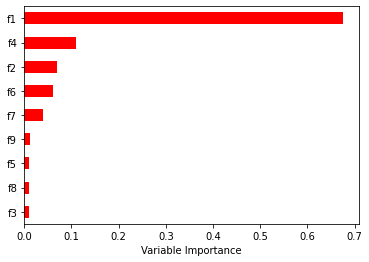

In [175]:
# Öznitelik önemlerini (feature importances) görselleştirin.
Importance = pd.DataFrame({"Importance": tuned_xgb_model.feature_importances_},
                           index = X_train.columns)

Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                             color = 'red')

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

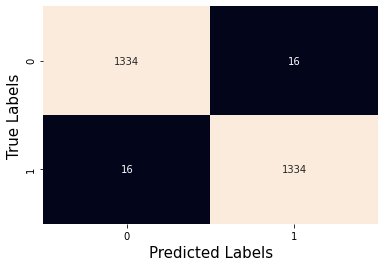

In [176]:
# Hata matrisini oluşturun ve accuracy, recall, precision ve f1-score değerlerini hesaplayın.
y_pred = tuned_xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True, cbar = False, fmt = "g");
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [177]:
# accuracy, recall, precision ve f1-score

print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
print("F1 Score = {}".format(f1_score(y_test, y_pred,average='macro')))

Accuracy = 0.9881481481481481
Recall = 0.9881481481481481
Precision = 0.9881481481481481
F1 Score = 0.9881481481481481


In [178]:
# Sonucunuzu değerlendirin ve veri setimiz için en iyi performans gösteren algoritmayı seçin.

In [1]:
# Bu çalişmada bir Classification problemi için DecisionTreeClassifier ve XGBoostClassifier algoritmalarını kullandım.
# İlk önce veri seti için gereken preprocessing işlemi uyguladıktan sonra verini model kurmak için hazırlamış oldum. 
# GridSearchCV kullanarak DecisionTreeClassifier ve XGBoostClassifier için optimum hyperparameter degerlerini buldum.
# Her iki modelin başarısını hata matrisi oluşturarak ve accuracy, recall, precision, f1-score değerlerini hesaplayarak ölçtüm.
# Sonuç olarak, değerlendirme metriklerine bakarak XGBoostClassifier'in DecisionTreeClassifier'den daha başarılı olduğunu gorebiliriz  